In [17]:
import numpy as np

import numpy.random as npr


import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

In [39]:
#Données

L_bob = 10.38 #Longueur bobine (m)
r_bob = 0.5 * 635*10**-9*2.71/(4.95*10**(-3)) #rayon de la bobine mesuré par diffraction (m)
i = 0.163 #courant traversant la bobine (A)

In [40]:
#Mesure 

T = np.array([22.4, 26.1, 36.2, 45.1, 55.2, 65.2, 75.1, 84.9]) #Température de l'eau dans laquelle trempe la bobine (C°)
U = np.array([414, 418, 432, 445, 459, 473, 487, 501])*10**-3 #Tension aux bornes de la bobine (V)

In [41]:
#Calcul de la résistivité de la bobine

R = U/i #résistance de la bobine
rho = R*np.pi*r_bob**2/L_bob #résistivité de la bobine

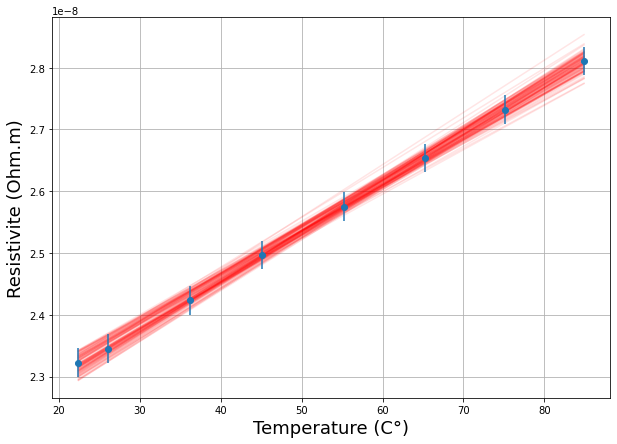

7.831249609470041e-11 +- 3.6221913414937034e-12
2.144607428658723e-08 +- 2.0476927658255265e-10


In [42]:
#Ajustement et Tracer de la résistivité de la bobine en fonction de la température du bain thermostaté

drho = rho[0]/100
dT = 0.1

#Monte-Carlo de la variation de température

def f_lin(x,a,b):
    return a*x+b

N_mc = 100 # nombre de simulations
param = np.zeros((2, N_mc))


for i in range(N_mc):
    
    rho_mc = np.array([])
    T_mc = np.array([])
    
    for k in range (len(T)) :
        rho_mc = np.append(rho_mc, npr.normal(loc=rho[k], scale=drho))
        T_mc = np.append(T_mc, npr.normal(loc=T[k], scale=dT))
            
    pop, covop = curve_fit(f_lin, T_mc, rho_mc)
    param[0,i] = pop[0]
    param[1,i] = pop[1]
    
y_th = f_lin(T, *pop)

plt.figure(5, figsize=(10,7))
for i in range(N_mc):
    y_th = f_lin(T, *param[:,i])
    plt.plot(T, y_th,'r', alpha=0.1)
plt.errorbar(T, rho, xerr=dT, yerr=drho, fmt='o')
plt.grid(which='both')
plt.xlabel('Temperature (C°)', fontsize=18)
plt.ylabel('Resistivite (Ohm.m)', fontsize=18)
plt.show()    

#Calcul de la pente

a_moy = np.mean(param[0,:])
a_sig = np.std(param[0,:])
b_moy = np.mean(param[1,:])
b_sig = np.std(param[1,:])

print (a_moy, '+-',a_sig )
print (b_moy, '+-',b_sig )


In [ ]:
#ajouter lien avec loi Wiedemann-Franz -> lambda * rho / T = constante de Lorenz = 2,44*10**-8 W.Ohm.K-2